# Nombres Aléatoires

Les méthodes de MonteCarlo dépendent énormément des nombres alétoires, il est donc important de faire une étude des générateurs de nombres aléatoires qui sont construits sur python. Ces générateurs sont basés sur certains algorithmes qui font des générations de nombres de manière quasi-aléatoire comme nous allons le voir.

Avant de commencer, commençons par quelques rappels qui vont être utiles tout au long de cette première partie du travail.

- La fonction cumulative $F(x)$ d'un processus aléatoire mesure la probabilité que le résultat d'un évenement soit égal ou inférieur à une valeur x. Il est clair que dans les limites nous avons $F(x\rightarrow -\infty)=0$ et $F(x\rightarrow \infty)=1$.

- La fonction de densité de probabilité est définie à partir de la dérivée de la fonction cumulative:
$$
p(x)=\frac{dF}{dx}(x)\Leftrightarrow F(x)=\int_{-\infty}^x p(y)dy.
$$
Plus précisément pour un petit $\Delta x$, alors $p(x)\Delta x$ réprésente la probabilité pour qu'un événement ait une valeur entre $x$ et $x +\Delta x$

La distribution la plus répandue est la $\textbf{distribution uniforme}$. Elle décrit simplement une séquence de nombres aléatoires, répartis dans un intervalle quelconque $[a,b]$. Puisque la probabilité d'avoir un nombre dans cet intervalle est constante et que nous devons avoir la condition de normalisation $\int_{-\infty}^{\infty} p(x)dx = 1$, nous obtenons la distribution suivante:

$$
p(x) = 
\begin{cases} 
\frac{1}{b-a} &\mbox{si } \in [a,b] \\ 
0 & \mbox{sinon } 
\end{cases} 
$$

Un autre type de distribution très répandu est la $\textbf{distribution gaussienne}$, définie par:

$$
p(x)=\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac12 (\frac{x-\mu}{\sigma})^2},
$$

où $\mu$ est la moyenne de la distribtuion et $\sigma$ et son écart-type. Ces deux quantités sont définies par:
-  $\mu = \sum_{i=1}^{\infty} x_ip_i$
- $\sigma = \sqrt{\sum_{i=1}^{\infty}p_i(x_i - \mu)^2}$





Maintenant que nous avons introduit ces deux types de distributions de probabilités, nous allons commencer les challenges.

Avant cela, importons comme d'habitude notre librairie python préférée et définissons quelques paramètres d'écritures.

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from numpy import exp , pi
import math
from math import factorial
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] =16

## Challenge n°1

- Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.


Dans ce module nous avons majoritairement utilisé la fonction "numpy.random.random_sample" qui prend comme variable un nombre et renvoit une liste de nombres aléatoires entre zéro et ce nombre.

In [2]:
x = numpy.random.random_sample(10)
print(x)

[0.28511221 0.77316188 0.38235878 0.78175341 0.09761851 0.35944174
 0.57908465 0.90788265 0.585726   0.01327006]


Mais un ordinateur ne peut pas réellement générer des nombres aléatoires, il peut simplement avoir des algorithmes qui renvoient une liste ressemblant à une liste de nombres aléatoires. En réalité, lorsque jupyter notebook est ouvert, un "seed" (un nombre) est choisi et ensuite ce seed augmente avec le temps d'une unité. Les fonctions soi-disant génératrices de nombres aléatoires, utilisent alors ce seed pour générer les nombres aléatoires. Lorsqu'on éxécute une cellule de code, le seed correspondant sera utilisé. Essayons rapidement avec un seed. Pour cela on utilise la fonction "numpy.random.seed" qui nous permet de définir le seed utilisé dans la cellule.

On remarquera immédiatement que même lorsqu'on ré-éxécute la cellule de code, la même liste de nombres aléatoires sera retournée.

In [3]:
numpy.random.seed(0)
x = numpy.random.random_sample(20) 
print(x)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215]


Maitenant qu'on fixe une valeur de seed, alors on peut étudier la manière dont les listes de nombres aléatoires sont renvoyées. Il est facile de voir que lorsqu'on demande une liste de nombres aléatoires, en fixant la valeur du "seed", les listes renvoyées sont simplement la succéssion des nombres aléatoires. Par exemple, ici la première liste contient les 5 premiers nombres de la liste ci-dessus, la deuxième les 5 suivants, et la dernière contient les 10 derniers nombres.

In [4]:
numpy.random.seed(0)
x = numpy.random.random_sample(5)
print(x)
y = numpy.random.random_sample(5)
print(y)
z = numpy.random.random_sample(10)
print(z)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
[0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
 0.0202184  0.83261985 0.77815675 0.87001215]


Si nous souhaitons maitenant avoir une distribution uniforme sur l'intervalle [a,b), il suffit de faire un ré-échelonnage de l'intervalle [0,1) par la formule 
$$
y = (b-a) x + a 
$$
où x est un nombre aléatoire issu de la distribution uniforme sur l'intervalle [0,1).

Nous allons vérifier que ceci marche comme attendu, en prenant une liste générée de manière uniforme grâce à la fonction "numpy.random.random_sample", de plusieurs nombres aléatoires et ensuite nous allons procéder au changement de variable ci-dessus. Si on dresse un histogramme de la liste de nombres aléatoires obtenus, on devrait obtenir une distribution uniforme. Si la liste générée est suffisamment grande on devrait observer une distribution uniforme mais cette fois-ci sur l'intervalle [a,b). Nous prenons ici $a=5$ et $b=20$.

In [5]:
#Génerer des nombres aléatoires entre a et b et plus 0 et 1.
a=5
b=20
x = numpy.random.random_sample(100000000)
y = (b-a)*x + a
print(y)
print(1/15)

[19.67927513 16.98737846 11.92219043 ...  7.20380094  8.96001272
 16.74827412]
0.06666666666666667


Puisque la distribution est uniforme nous devrions avoir une probabilité d'avoir chaque nombre égale:

$$
\begin{cases} 
p(x)=\frac{1}{b-a}=\frac{1}{15}, \text{ si x $\in$ [a,b)}\\
\text{0 sinon}
\end{cases}
$$

Remarquons de plus que $\frac{1}{15}=0.066...7$. Nous créons un histogramme en prenant des valeurs hors de notre intervalle pour voir si la probabilité est nulle hors de l'intervalle considéré.
Regardons notre histogramme:

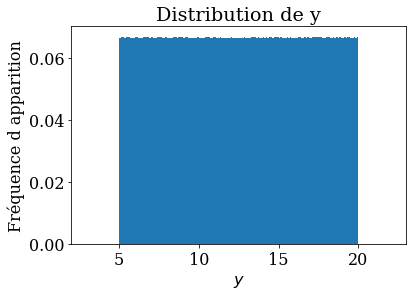

In [6]:
binwidth=0.1 #Largeur des colonnes

pyplot.xlim(2,23)
pyplot.title("Distribution de y")
pyplot.xlabel('$y$')
pyplot.ylabel("Fréquence d apparition")
pyplot.hist(y,bins=numpy.arange(2,23, binwidth),normed=True);

Ceci montre que la probabilité converge bel et bien vers la probabilité de la distribution uniforme, comme attendu.

Regardons maintenant d'autre générateurs de nombres aléatoires provenant de la librarie numpy. D'abord, nous remettons un "seed" aléatoire. Commençons d'abord par des générateurs de variables aléatoires simples. Nous avons choisi de tester les fonctions suivantes:
- "numpy.random.rand" qui prend comme variable un nombre x et qui renvoit une liste de taille x de nombres aléatoires pris de la distribution uniforme dans l'intervalle [0,1).

- "numpy.random.randn" qui prend comme variable un nombre x, et qui renvoie x nombres aléatoires pris par rapport à une loi normale standard.

- "numpy.random.randint" qui prend comme variables x, y et z qui rend une liste de taille z d'entiers pris de la distribution uniforme discrète compris dans l'intervalle [x,y).

- "numpy.random.choice" qui prend comme variable une liste et qui renvoie un élement de cette liste de manière aléatoire.

Testons ces 5 fonctions. La première "numpy.random.rand":

In [7]:
numpy.random.seed()
NMC = 100000000 # la taille de l'échantillon est NMC
r= numpy.random.rand(NMC)
print(r)

[0.58914285 0.45226871 0.60195772 ... 0.63332862 0.91295374 0.76092741]


Puisque les nombres sont pris d'une distribution uniforme dans l'intervalle [0,1), nous avons que la probabilité d'avoir un nombre dans cet interval est 
$$
\begin{cases}
p(x)=1/1 = 1, \text{ si x $\in$ [0,1)} \\
\text {0 sinon}
\end{cases}
$$
Vérifions cela avec un histogramme et une grande liste de nombres:

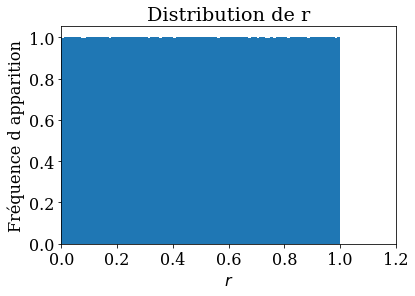

In [8]:
binwidth=0.01 #Largeur des colonnes

pyplot.xlim(0,1.2)
pyplot.title("Distribution de r")
pyplot.xlabel('$r$')
pyplot.ylabel("Fréquence d apparition")
pyplot.hist(r,bins=numpy.arange(0,1.2, binwidth),normed=True);

Nous retrouvons en effet une distribution uniforme sur l'intervalle considéré.

La deuxième fonction est "numpy.random.randn":

In [9]:
y= numpy.random.randn(NMC)
print(y)

[-0.91366458 -2.35238602  0.13220832 ... -0.44970512 -0.81397598
  0.12616105]


Cette fois-ci créons un histogramme pour voir si les nombres sont générés selon une distribution normale mais aussi regardons la courbe d'une distribution normale standard, et regardons si elle s'approche de ce que nous observons.
La noi normale standard est une gaussienne de $\mu = 0$ et $\sigma =1$. Nous avons donc que la probabilité décrite par une telle loi est:
$$
p(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$

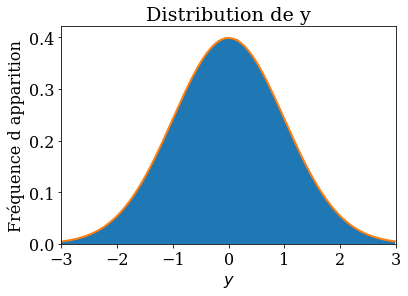

In [10]:
binwidth=0.01 #Largeur des colonnes

x=numpy.arange(-3,3,0.01)
pyplot.xlim(-3,3)

pyplot.title("Distribution de y")
pyplot.xlabel('$y$')
pyplot.ylabel("Fréquence d apparition")

pyplot.hist(y,bins=numpy.arange(-3,3, binwidth),normed=True);
pyplot.plot(x,(1/(numpy.sqrt(2*numpy.pi)))*numpy.exp((-1/2)*x**2),lw=2) # Loi Normale standard

On voit bien que la génération des nombres aléatoires est en effet parfaitement concordante avec une distribution normale standard.

La troisème fonction que nous testons est la fonction "numpy.random.randint".

In [11]:
z= numpy.random.randint(0,100,NMC)
print(z)

[25 43 74 ... 87 90  1]


Regardons encore une fois sur un histogramme en générant une liste de nombres très grande. Puisque la distribution est uniforme, si nous prenons des compartiments d'histogramme de taille 1, nous devrions avoir une probabilité:
$$
\begin{cases}
p(x)= 1/100 , \text{ si x $\in$ [0,100) (et x entier)}\\
\text{ 0 sinon}
\end{cases}
$$

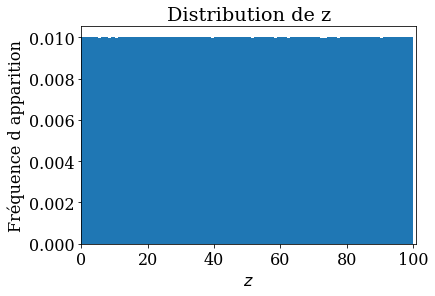

In [12]:
binwidth=1 #Largeur des colonnes

pyplot.xlim(0,101)
pyplot.title("Distribution de z")
pyplot.xlabel('$z$')
pyplot.ylabel("Fréquence d apparition")

pyplot.hist(z,bins=numpy.arange(0,101, binwidth),normed=True);

C'est bien ce que nous observons encore une fois.

La quatrième fonction que nous étudions est la fonction "numpy.random.choice"

In [13]:
t=numpy.random.choice(z)
print(t)

39


Vérifions que cet élement était bien dans la liste "z". Nous le faisons simplement pour les 150 première valeurs, sinon la boucle continue jusqu'à avoir parcouru tous les élements de la liste "z" or, l'élément en question se trouve déjà dans les 150 premières valeurs de la liste "z".

In [14]:
for i in range(200):
    if z[i]==t:
        print('Trouvé!')

Trouvé!
Trouvé!
Trouvé!


On veut voir si le choix est fait de manière réellement aléatoire, ou si quelques éléments sont préférés à d'autres. Pour cela, nous créons un vecteur "t" qui va être créé à partir de choix aléatoires de notre liste précédente "z". En dressant l'ihistogramme des valeurs de la liste "t" nous pourrons voir directement si le choix semble parfaitement aléatoire ou pas.

In [30]:
t=numpy.zeros(10000000)
for i in range(10000000):
    t[i]=numpy.random.choice(z)
print(t)

[16. 53. 61. ... 89. 30. 11.]


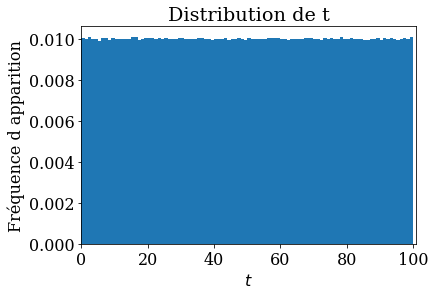

In [31]:
binwidth=1 #Largeur des colonnes

pyplot.xlim(0,101)
pyplot.title("Distribution de t")
pyplot.xlabel('$t$')
pyplot.ylabel("Fréquence d apparition")


pyplot.hist(t,bins=numpy.arange(0,101, binwidth),normed=True);

Le choix des valeurs de la liste "z" semble donc être parfaitement aléatoire, aucune élement de la liste "z" semble être pris plus de fois qu'un autre.

Maitenant regardons les distributions que numpy nous offre. Nous commençons par la distribution de Rayleigh, dont la densité de probabilité est définie par:
$$
f(x,\sigma)=\frac{x}{\sigma^2}e^{-\frac{x^2}{2\sigma^2}}
$$
où $\sigma$ est un paramètre arbitraire.

Nous allons procéder comme ci-dessus, c'est-à-dire faire un histogramme d'une liste générée par numpy, et dresser également le graphe de la distribution de probabilité correspondante. Pour cela nous allons utiliser la fonction " numpy.random.rayleigh" qui prend comme paramètres le paramètre $\sigma$ et la taille de la liste de nombres à générer, et qui renvoit la liste de ces nombres générés suivant une distribution de Rayleigh.

In [32]:
rayleigh=numpy.random.rayleigh(10,NMC)
print(rayleigh)

[12.89803176  4.37895656  9.29522655 ...  8.58823331  5.2206033
  1.24041459]


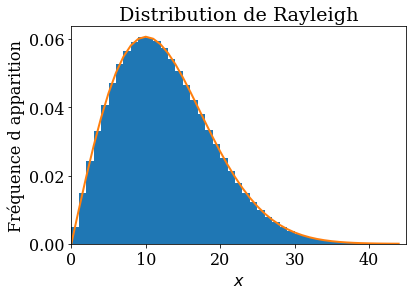

In [33]:
binwidth = 1
pyplot.xlim(0,45)
pyplot.title("Distribution de Rayleigh")
pyplot.xlabel('$x$')
pyplot.ylabel("Fréquence d apparition")

pyplot.hist(rayleigh,bins=numpy.arange(0,45, binwidth),normed=True);

x=numpy.arange(0,45,1)
sigma=10
pyplot.plot(x,x*numpy.exp(-x**2/(2*sigma**2))/(sigma**2),lw=2)

Ici encore la génération des nombres par la distribution de Rayliegh, semble tout à fait correspondre à la distribution de probabilité de Rayleigh.

Passons maintenant à l'étude de la distribution de probabilité exponentielle et gaussienne.

Commençons par la distribution exponentielle. Rappellons que la densité de probabilité exponentielle est donnée par!
$$
p(x)= \lambda e^{-\lambda x}
$$
où $\lambda$ est un paramètre aléatoire. Nous allons utiliser la fonction "numpy.random.exponential" qui prend comme paramètre  $\beta$ qui est défini comme $\beta=\frac{1}{\lambda}$ et un paramètre s qui détermine la taille de la liste générée par cette fonction et qui renvoie une liste de nombres générés selon une distribution exponentielle de paramètre $\lambda$. Procédons comme ci-dessus, en utilisant la fonction pour générer une grande liste de nombres, en dressant l'histogramme des valeurs obtenues et en comparant avec le graphique de la distribution de probabilités. Pour tester cette fonction nous allons prendre $ \lambda $ =3.

In [34]:
lambda_1=3
Beta_1=1/lambda_1
e=numpy.random.exponential(Beta_1,NMC)

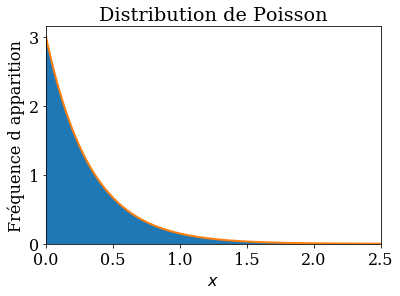

In [35]:
binwidth=0.01

x=numpy.arange(0.,5.,binwidth)
pyplot.xlim(0,2.5)
pyplot.title("Distribution de Poisson")
pyplot.xlabel('$x$')
pyplot.ylabel("Fréquence d apparition")

pyplot.hist(e,bins=numpy.arange(0.,5.,binwidth),normed=True)

pyplot.plot(x,lambda_1*numpy.exp(-lambda_1*x),lw=2)

La correspondance est remarquable , de la même manière que pour la distribution de Rayliegh. Comparons maitenant cette fonction et la version implémentée proposée dans le cours, nommée méthode des fonctions inversibles.

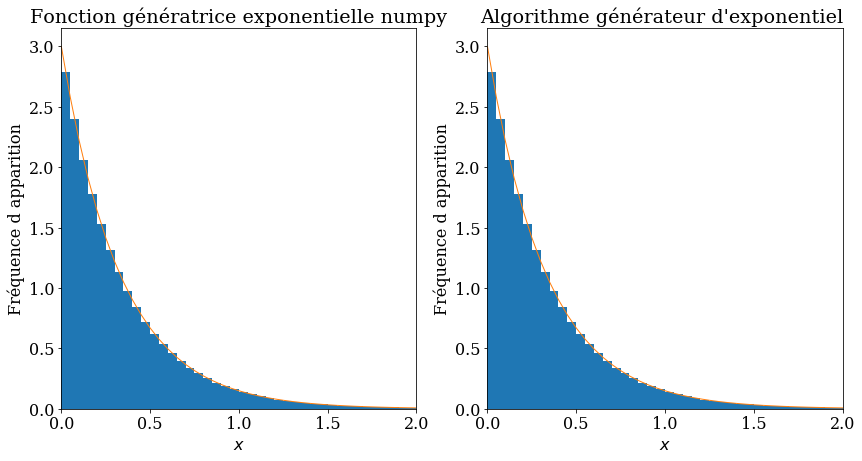

In [36]:
x_unif = numpy.random.random_sample(NMC)
y = -1/lambda_1*numpy.log(1-x_unif)

binwidth=0.05
x=numpy.arange(0.,5.,binwidth)

fig = pyplot.figure(figsize=(14,7))
pyplot.subplot(1,2,1)
pyplot.title("Fonction génératrice exponentielle numpy")
pyplot.xlabel('$x$')
pyplot.ylabel("Fréquence d apparition")
pyplot.xlim(0,2)
pyplot.hist(e,bins=numpy.arange(0.,5.,binwidth),normed=True);
pyplot.plot(x,lambda_1*numpy.exp(-lambda_1*x), lw=1)

pyplot.subplot(1,2,2)
pyplot.title("Algorithme générateur d'exponentiel ")
pyplot.xlabel('$x$')
pyplot.ylabel("Fréquence d apparition")
pyplot.xlim(0,2)
pyplot.hist(y,bins=numpy.arange(0.,5., binwidth),normed=True);
pyplot.plot(x,lambda_1*numpy.exp(-lambda_1*x), lw=1)


On voit que les deux fonctions redonnent un résultat égal.

Procédons à la même analyse mais cette fois-ci, avec la distribution de probabilités Gaussienne. On va utiliser la fonction "numpy.random.normal" qui prend comme arguments la moyenne et l'ecart-type et la taille de la liste de nombres à générer et qui renvoit une liste de nombres générés selon une loi Gaussienne de moyenne $\mu$ et d'écart-type $\sigma$. Nous allons prendre $\mu = 0$ et $\sigma = 1$ pour tester cette fonction. Rappellons que la distribution Gaussienne est donnée par:
$$
p(x)=\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac12 (\frac{x-\mu}{\sigma})^2},
$$

In [37]:
mu=0
sigma=1
r=numpy.random.normal(mu,sigma,NMC)

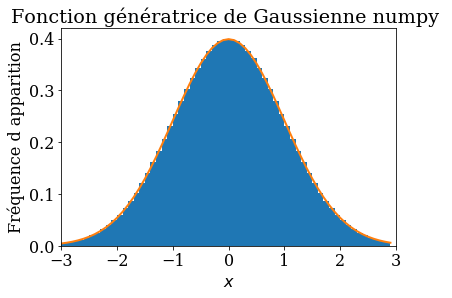

In [38]:
binwidth=0.1

x=numpy.arange(-3,3,binwidth)
pyplot.title("Fonction génératrice de Gaussienne numpy ")
pyplot.xlabel('$x$')
pyplot.ylabel("Fréquence d apparition")
pyplot.xlim(-3,3)

pyplot.hist(r,bins=numpy.arange(-3,3,binwidth),normed=True)
pyplot.plot(x,(1/(sigma*numpy.sqrt(2*numpy.pi)))*numpy.exp((-1/2)*((x-mu)/(sigma))**2),lw=2)

Comparons avec la version implémentée par la méthode de rejection de Von Neumann. Nous prenons ici les mêmes paramètres que dans le cours.

Acceptance ratio: 0.71381


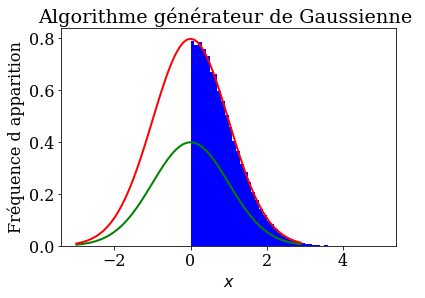

In [39]:
N = 100000
K = 1.4

h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    g = numpy.log(1/(1-u1))
    
    # Generer un deuxième nombre pour la condition d'acceptance/rejection
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-(g)))
    if (u2<ratio):
        h.append(g)

uniform1 = numpy.random.random_sample(N)

g = numpy.log(1/(1-uniform1))

p_g_exp = numpy.exp(-g)

p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

# On utilise une deuxième distribution uniforme pour l'acceptance
uniform2 = numpy.random.random_sample(N)

# On crée une condition d'acceptance
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# On extrait les nombres vérifiant la condition.
h = numpy.extract(condition,g)

# Print le ration d'acceptance.
print("Acceptance ratio:",h.size/g.size)

# Plots
pyplot.xlim=(0,4)
binwidth=0.1
bins=numpy.arange(-0,5.1, binwidth)

pyplot.title("Algorithme générateur de Gaussienne ")
pyplot.xlabel('$x$')
pyplot.ylabel("Fréquence d apparition")

pyplot.hist(h,bins,normed='true',color='blue');
pyplot.plot(x,numpy.exp(-x**2/2.0)/numpy.sqrt(2*numpy.pi),lw=2,color='green')#Gaussienne attendue
pyplot.plot(x,2*numpy.exp(-x**2/2.0)/numpy.sqrt(2*numpy.pi),lw=2,color='red')#Gaussienne multipliée par un facteur 2


On ne génère des nombres uniquement positifs, c'est pour ça que la Gaussienne est en fait multipliée par deux. On n'a donc pas du tout la même génération de nombres que par la fonction "numpy.random.normal".

Après cette description extensive des différents générateurs de la librairie numpy, passons maintenant au deuxième challenge.

## Challenge n°2

- Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.



La méthode de Box-Muller permet de générer des nombres aléatoires selon une distribution Gaussienne, à partir de nombres générés d'une distribution uniforme.

Pour cela, il suffit simplement de prendre deux variables aléatoires x et y d'une distribution uniforme, et de
procéder au changement de variables suivant:

$$
\begin{cases}\\
    G_1=\sqrt{-2\text{ln}x}\text{cos}(2\pi y) \\\\
    G_2=\sqrt{-2\text{ln}x}\text{sin}(2\pi y) \\\\
\end{cases}
$$

Alors dans ce cas, les variables aléatoires $G_1$ et $G_2$ sont des variables aléatoires indépendantes qui suivent une loi nomrale standard, c'est-à-dire une loi Gaussienne de moyenne 0 et d'écart-type 1.

Implémentons ceci en générant d'abord des variables aléatoires x et y selon une distribution uniforme avec la fonction " numpy.random.sample".

In [40]:
NMC = 1000000
x=numpy.random.sample(NMC)
y=numpy.random.sample(NMC)

Une simple boucle "for" permet alors de faire le changement de variables, et nous allons directement pouvoir voir sur un histogramme si les variables obtenues après ce changement sont en effet distribuées selon une loi normale standard.

In [41]:
x=numpy.random.sample(NMC)
y=numpy.random.sample(NMC)

z_1=numpy.zeros(NMC)
z_2=numpy.zeros(NMC)
for i in range(NMC):
        z_1[i]=numpy.sqrt(-2*numpy.log(x[i]))*numpy.cos(2*numpy.pi*y[i])
        z_2[i]=numpy.sqrt(-2*numpy.log(x[i]))*numpy.sin(2*numpy.pi*y[i])
print(len(z_1),len(z_2))

1000000 1000000


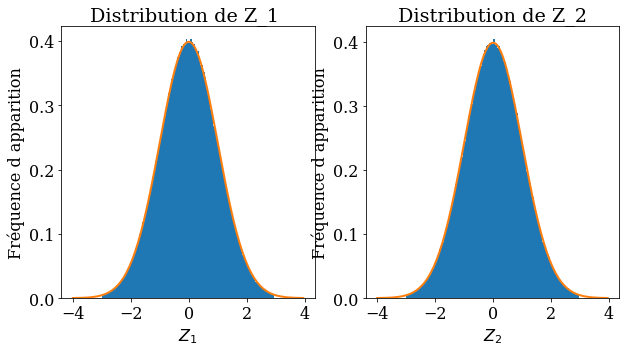

In [42]:
fig = pyplot.figure(figsize=(10,5))

binwidth=0.05
x=numpy.arange(-4.,4., binwidth)

pyplot.subplot(1,2,1)
pyplot.title("Distribution de Z_1 ")
pyplot.xlabel('$Z_1$')
pyplot.ylabel("Fréquence d apparition")
pyplot.hist(z_1,bins=numpy.arange(-3.0,3.0,0.05),normed=True)
pyplot.plot(x,(1/(numpy.sqrt(2*numpy.pi)))*numpy.exp((-1/2)*x**2),lw=2)

pyplot.subplot(1,2,2)
pyplot.title("Distribution de Z_2")
pyplot.xlabel('$Z_2$')
pyplot.ylabel("Fréquence d apparition")
pyplot.hist(z_2,bins=numpy.arange(-3.0,3.0,0.05),normed=True)
pyplot.plot(x,(1/(numpy.sqrt(2*numpy.pi)))*numpy.exp((-1/2)*x**2),lw=2)

On voit bien que le résultat est tout à fait remarquable, et qu'on obtient bien une loi normale standard. Cependant les queues de distributions ne semblent pas être bien représentées par cette méthode.

## Conclusion

On a vu différent types de générateurs de nombres aléatoires dans ce module, et de facto, ils fonctionnent tous comme attendu.  Notamment, les générateurs de nombres aléatoires selon une distribution de probabilité Gaussienne et exponentielle semblent fonctionner à merveille. On a, de plus, vu la méthode de Box-Muller qui est une méthode simple de génération de nombres aléatoires selon une loi normale standard à partir de nombres générés d'une distribution uniforme. Tous ces générateurs de nombres aléatoires sont très répandus, et sont très utilisés dans les méthodes de MonteCarlo, que nous allons découvrir plus loin. Mais d'abord, étudions le mouvement d'une particule dans un gaz, grâce au mouvement Brownien.